In [54]:
import cv2
import numpy as np
import os

# Create a directory to save the binary images if it doesn't exist
gray_dir = 'gray_images'
output_dir = 'binary_images'
os.makedirs(output_dir, exist_ok=True)

k = 1
K = 1

# Define the directory containing the images
directory = 'C:/Users/91879/Documents/bitemark_code/dataset'

for filename in os.listdir(directory):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        file_path = os.path.join(directory, filename)
        img_bite = cv2.imread(file_path)

        if img_bite is None:
            print(f'Error: Unable to read image {filename}')
            continue

        Row, Col, Dim = img_bite.shape

        img_bite_gray = cv2.cvtColor(img_bite, cv2.COLOR_BGR2GRAY)
        A = ' Person ' + str(k)
        I = '  Image Number ' + str(K)
        person_img = A + I

        K += 1
        if K % 3 == 0:
            K = 1
            k += 1

        max_IG = np.max(img_bite_gray)
        min_IG = np.min(img_bite_gray)

        thresh = min_IG
        img_bite_binary = np.zeros((Row, Col), dtype=np.uint8)

        for row in range(Row):
            for col in range(Col):
                if img_bite_gray[row, col] > (min_IG + np.ceil(max_IG / 6)):
                    img_bite_binary[row, col] = 0
                else:
                    img_bite_binary[row, col] = 255

        img_bite_binary = cv2.medianBlur(img_bite_binary, 3)

        # Save the binary image in the output directory
        gray_output = os.path.join(gray_dir, f'img_bite_gray_{os.path.splitext(filename)[0]}.png')
        output_file = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.png')
        cv2.imwrite(gray_output, img_bite_gray)
        cv2.imwrite(output_file, img_bite_binary)

        print(f'Saved gray and binary images for {filename}')

print('All gray and binary images saved successfully.')

Saved gray and binary images for A1.JPG
Saved gray and binary images for A2.JPG
Saved gray and binary images for A3.JPG
Saved gray and binary images for A4.JPG
Saved gray and binary images for C1.JPG
Saved gray and binary images for C2.JPG
Saved gray and binary images for C3.JPG
Saved gray and binary images for C4.JPG
Saved gray and binary images for D1.JPG
Saved gray and binary images for D2.JPG
Saved gray and binary images for D3.JPG
Saved gray and binary images for D4.JPG
Saved gray and binary images for K1.JPG
Saved gray and binary images for K2.JPG
Saved gray and binary images for K3.JPG
Saved gray and binary images for K4.JPG
Saved gray and binary images for N1.JPG
Saved gray and binary images for N2.JPG
Saved gray and binary images for N3.JPG
Saved gray and binary images for N4.JPG
Saved gray and binary images for Q1.JPG
Saved gray and binary images for Q2.JPG
Saved gray and binary images for Q3.JPG
Saved gray and binary images for Q4.JPG
All gray and binary images saved success

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to process binary images
def process_binary_image(image_path):
    # Read binary image
    binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Connected component analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

    # Remove small regions
    min_area = 100  # Adjust this threshold based on your requirement
    for i in range(1, num_labels):  # Exclude background label
        if stats[i, cv2.CC_STAT_AREA] < min_area:
            binary_image[labels == i] = 0

    # Perform morphological operations (erosion followed by dilation) to remove small holes
    kernel = np.ones((5, 5), np.uint8)
    binary_image = cv2.erode(binary_image, kernel, iterations=1)
    binary_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Perform morphological operations (dilation followed by erosion) to join disconnected parts
    binary_image = cv2.dilate(binary_image, kernel, iterations=1)
    binary_image = cv2.erode(binary_image, kernel, iterations=1)

    return binary_image

# Path to the folder containing binary images
folder_path = 'binary_images/'

# Create folder for final images if it does not exist
output_folder = 'final_binary_image'
os.makedirs(output_folder, exist_ok=True)

# Iterate over each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        # Process the image
        image_path = os.path.join(folder_path, filename)
        processed_image = process_binary_image(image_path)

        # Save processed image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, processed_image)

        print(f"Processed image saved: {output_path}")

Processed image saved: final_binary_image\A1.png
Processed image saved: final_binary_image\A2.png
Processed image saved: final_binary_image\A3.png
Processed image saved: final_binary_image\A4.png
Processed image saved: final_binary_image\C1.png
Processed image saved: final_binary_image\C2.png
Processed image saved: final_binary_image\C3.png
Processed image saved: final_binary_image\C4.png
Processed image saved: final_binary_image\D1.png
Processed image saved: final_binary_image\D2.png
Processed image saved: final_binary_image\D3.png
Processed image saved: final_binary_image\D4.png
Processed image saved: final_binary_image\K1.png
Processed image saved: final_binary_image\K2.png
Processed image saved: final_binary_image\K3.png
Processed image saved: final_binary_image\K4.png
Processed image saved: final_binary_image\N1.png
Processed image saved: final_binary_image\N2.png
Processed image saved: final_binary_image\N3.png
Processed image saved: final_binary_image\N4.png
Processed image save

In [9]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the folder containing binary images
input_folder = "final_binary_image"

# Path to the parent folder where augmented images will be saved
output_parent_folder = "final_dataset"
os.makedirs(output_parent_folder, exist_ok=True)

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.03,
    height_shift_range=0.03,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Limit of augmented images for each input image
max_augmented_images = 400

# Iterate through each image in the input folder
for root, dirs, files in os.walk(input_folder):
    for file in files:
        # Load the image
        image_path = os.path.join(root, file)
        image = cv2.imread(image_path)
        image = np.expand_dims(image, axis=0)

        # Generate and save augmented images
        iterator = datagen.flow(image, batch_size=1)
        augmented_images_count = 0
        for i, augmented_image in enumerate(iterator):
            if augmented_images_count >= max_augmented_images:
                break  # Stop augmenting once the limit is reached
            
            augmented_image = augmented_image[0].astype('uint8')
            class_label = file.split('.')[0]  # Use file name as class label
            output_folder = os.path.join(output_parent_folder, class_label)
            os.makedirs(output_folder, exist_ok=True)
            augmented_image_filename = f"{class_label}_{i}.png"
            output_path = os.path.join(output_folder, augmented_image_filename)
            cv2.imwrite(output_path, augmented_image)
            print(f"Augmented image saved to: {output_path}")

            augmented_images_count += 1 

Augmented image saved to: final_dataset\A1\A1_0.png
Augmented image saved to: final_dataset\A1\A1_1.png
Augmented image saved to: final_dataset\A1\A1_2.png
Augmented image saved to: final_dataset\A1\A1_3.png
Augmented image saved to: final_dataset\A1\A1_4.png
Augmented image saved to: final_dataset\A1\A1_5.png
Augmented image saved to: final_dataset\A1\A1_6.png
Augmented image saved to: final_dataset\A1\A1_7.png
Augmented image saved to: final_dataset\A1\A1_8.png
Augmented image saved to: final_dataset\A1\A1_9.png
Augmented image saved to: final_dataset\A1\A1_10.png
Augmented image saved to: final_dataset\A1\A1_11.png
Augmented image saved to: final_dataset\A1\A1_12.png
Augmented image saved to: final_dataset\A1\A1_13.png
Augmented image saved to: final_dataset\A1\A1_14.png
Augmented image saved to: final_dataset\A1\A1_15.png
Augmented image saved to: final_dataset\A1\A1_16.png
Augmented image saved to: final_dataset\A1\A1_17.png
Augmented image saved to: final_dataset\A1\A1_18.png
Aug

In [12]:
import cv2
import numpy as np
import os
import pandas as pd
from scipy.optimize import curve_fit

# Function to fit a parabola to centric points
def fit_parabola(centric_points):
    if len(centric_points) < 3:
        return 0  # Return 0 if not enough points to fit a parabola

    # Define a parabola function
    def parabola(x, a, b, c):
        return a * x**2 + b * x + c

    # Extract x and y coordinates of centric points
    x_points = [point[0] for point in centric_points]
    y_points = [point[1] for point in centric_points]

    try:
        # Fit a parabola to the centric points
        popt, _ = curve_fit(parabola, x_points, y_points)
        # Extract coefficient A
        coefficient_a = popt[0]
    except:
        coefficient_a = 0  # Set coefficient A to 0 if fitting fails

    return coefficient_a

# Function to detect centric points of the anterior teeth from a binary image
def detect_anterior_teeth_centric_points(binary_image):
    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to isolate the anterior teeth region
    min_contour_area = 500  # Adjust as needed
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Extract centroids of contours
    centric_points = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            centric_points.append((cX, cY))

    return centric_points

# Function to find left canine
def find_left_canine(binary_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the contour with the largest area (assuming it's the left canine tooth)
    largest_contour = max(contours, key=cv2.contourArea)
    # Calculate the centroid of the contour
    M = cv2.moments(largest_contour)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # Return the centroid coordinates and the largest contour
    return (cx, cy), largest_contour

# Function to find right canine
def find_right_canine(binary_image, left_canine_centroid):
    # Calculate the coordinates of the right canine (assuming it's symmetrically opposite to the left canine)
    left_canine_x, left_canine_y = left_canine_centroid
    right_canine_x = 2 * left_canine_x
    right_canine_y = 2 * left_canine_y
    # Return the centroid coordinates of the right canine
    return (right_canine_x, right_canine_y)

# Function to calculate canine-canine distance (CC)
def calculate_cc(left_canine, right_canine):
    # Calculate the distance between left and right canines (CC)
    cc_distance = np.sqrt((right_canine[0] - left_canine[0])**2 + (right_canine[1] - left_canine[1])**2)
    return cc_distance

# Function to find anterior teeth contours and calculate distances between them
def find_anterior_teeth_distances(binary_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Sort contours from left to right based on their x-coordinate
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
    # Consider only the first 6 contours (teeth)
    anterior_teeth_contours = contours[:6]

    # Calculate distances between all pairs of teeth
    distances = []
    for i in range(len(anterior_teeth_contours)):
        for j in range(i + 1, len(anterior_teeth_contours)):
            contour1 = anterior_teeth_contours[i]
            contour2 = anterior_teeth_contours[j]
            # Calculate centroids of contours
            M1 = cv2.moments(contour1)
            cx1 = int(M1['m10'] / (M1['m00'] + 1e-5)) if M1['m00'] != 0 else 0
            cy1 = int(M1['m01'] / (M1['m00'] + 1e-5)) if M1['m00'] != 0 else 0

            M2 = cv2.moments(contour2)
            cx2 = int(M2['m10'] / (M2['m00'] + 1e-5)) if M2['m00'] != 0 else 0
            cy2 = int(M2['m01'] / (M2['m00'] + 1e-5)) if M2['m00'] != 0 else 0

            # Calculate distance between centroids and round to two decimal points
            distance = round(np.sqrt((cx2 - cx1)**2 + (cy2 - cy1)**2), 2)
            distances.append(distance)

    return distances

# Parent directory containing all subdirectories
parent_directory = r'C:\Users\91879\Documents\bitemark_code\final_dataset'

# Initialize lists to store feature names and values
feature_names = ['Image Name', 'Canine-Canine Distance (CC)', 'Coefficient A']
for i in range(1, 15):
    feature_names.append(f'HTT-D_{i}')

feature_values = []

# Iterate over each directory in the parent directory
for directory in os.listdir(parent_directory):
    # Get the full path of the subdirectory
    subdirectory = os.path.join(parent_directory, directory)
    # Check if it's a directory
    if os.path.isdir(subdirectory):
        # Iterate over each image in the subdirectory
        for filename in os.listdir(subdirectory):
            if filename.endswith(".png"):
                # Read the image
                image_path = os.path.join(subdirectory, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                
                # Find the centroid of the left canine
                left_canine_centroid, _ = find_left_canine(image)
                
                # Find the centroid of the right canine
                right_canine_centroid = find_right_canine(image, left_canine_centroid)
                
                # Calculate the CC distance
                cc_distance = calculate_cc(left_canine_centroid, right_canine_centroid)
                
                # Find coefficient A
                coefficient_a = fit_parabola(detect_anterior_teeth_centric_points(image))
                
                # Calculate distances between anterior teeth contours
                distances = find_anterior_teeth_distances(image)
                
                # Split HTT-D into 14 separate columns
                htt_d_columns = [0] * 14
                for i, d in enumerate(distances):
                    if i < 14:
                        htt_d_columns[i] = d
                
                # Append feature values to the list
                feature_values.append([filename, cc_distance, coefficient_a] + htt_d_columns)

# Create a DataFrame to store the features
df = pd.DataFrame(feature_values, columns=feature_names)

# Write the DataFrame to an Excel file
output_excel = 'Features.xlsx'
df.to_excel(output_excel, index=False)

print(f'Output saved to {output_excel}')

Output saved to Features.xlsx


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the data
data = pd.read_excel("Features.xlsx")

# Extract features (X) and labels (y)
X = data.drop(columns=['Image Name', 'Labels']).values
y = data['Labels'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Save label encoder classes to a file
np.save("Bite_label_encoder_classes.npy", label_encoder.classes_)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train_encoded)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print("\nTest Accuracy:", test_accuracy)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Decode labels
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, zero_division=1))

# Save the trained model in the native Keras format
model.save("Bite_trained_ann_model.keras")

# Save the trained model weights
model.save_weights("Bite_trained_ann_model_weights.h5")

Epoch 1/20


217/217 [==============================] - 1s 2ms/step - loss: 16.3578 - accuracy: 0.6316 - val_loss: 3.4167 - val_accuracy: 0.7945
Epoch 2/20
217/217 [==============================] - 0s 1ms/step - loss: 1.2089 - accuracy: 0.8940 - val_loss: 0.4562 - val_accuracy: 0.9597
Epoch 3/20
217/217 [==============================] - 0s 1ms/step - loss: 0.6189 - accuracy: 0.9374 - val_loss: 0.3886 - val_accuracy: 0.9675
Epoch 4/20
217/217 [==============================] - 0s 1ms/step - loss: 0.7712 - accuracy: 0.9334 - val_loss: 0.1700 - val_accuracy: 0.9896
Epoch 5/20
217/217 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.9565 - val_loss: 0.3640 - val_accuracy: 0.9688
Epoch 6/20
217/217 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.9647 - val_loss: 0.3394 - val_accuracy: 0.9207
Epoch 7/20
217/217 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.9688 - val_loss: 1.7053 - val_accuracy: 0.7724
Epo

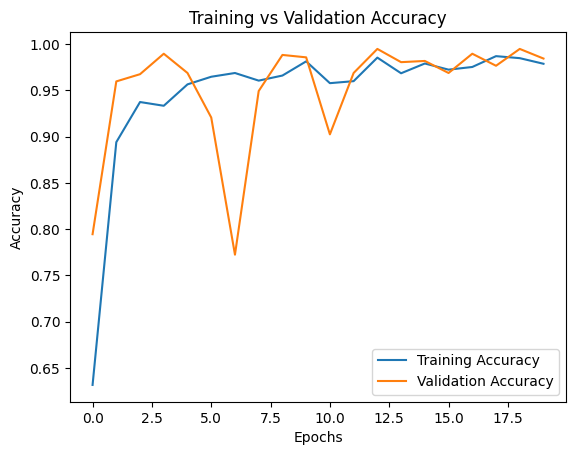

In [17]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

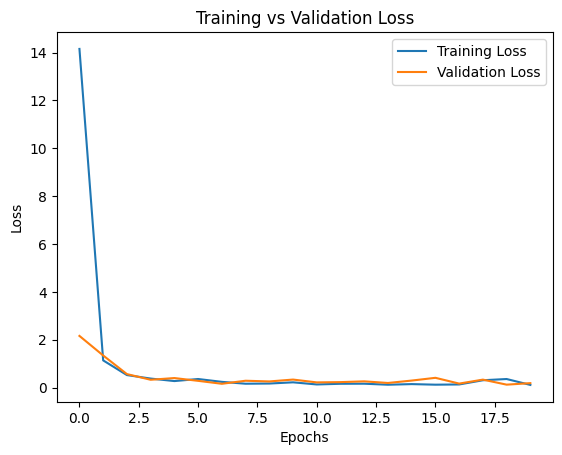

In [6]:
# Plot training vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [20]:
import cv2
import numpy as np
from scipy.optimize import curve_fit
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder

def convert_to_binary(image):
    Row, Col, Dim = image.shape

    img_bite_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    max_IG = np.max(img_bite_gray)
    min_IG = np.min(img_bite_gray)

    img_bite_binary = np.zeros((Row, Col), dtype=np.uint8)

    for row in range(Row):
        for col in range(Col):
            if img_bite_gray[row, col] > (min_IG + np.ceil(max_IG / 6)):
                img_bite_binary[row, col] = 0
            else:
                img_bite_binary[row, col] = 255

    binary_image = cv2.medianBlur(img_bite_binary, 3)

    return binary_image 

def processed_binary_image(binary_image):
    # Connected component analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

    # Remove small regions
    min_area = 100  # Adjust this threshold based on your requirement
    for i in range(1, num_labels):  # Exclude background label
        if stats[i, cv2.CC_STAT_AREA] < min_area:
            binary_image[labels == i] = 0

    # Perform morphological operations (erosion followed by dilation) to remove small holes
    kernel = np.ones((5, 5), np.uint8)
    binary_image = cv2.erode(binary_image, kernel, iterations=1)
    binary_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Perform morphological operations (dilation followed by erosion) to join disconnected parts
    binary_image = cv2.dilate(binary_image, kernel, iterations=1)
    binary_image = cv2.erode(binary_image, kernel, iterations=1)

    # Return the processed binary image
    return binary_image
    
# Function to fit a parabola to centric points
def fit_parabola(centric_points):
    if len(centric_points) < 3:
        return None  # Not enough points to fit a parabola

    # Define a parabola function
    def parabola(x, a, b, c):
        return a * x**2 + b * x + c

    # Extract x and y coordinates of centric points
    x_points = [point[0] for point in centric_points]
    y_points = [point[1] for point in centric_points]

    # Fit a parabola to the centric points
    popt, _ = curve_fit(parabola, x_points, y_points)

    # Extract coefficient A
    coefficient_a = popt[0]

    return coefficient_a

# Function to detect centric points of the anterior teeth from a binary image
def detect_anterior_teeth_centric_points(new_binary_image):
    # Find contours
    contours, _ = cv2.findContours(new_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to isolate the anterior teeth region
    min_contour_area = 500  # Adjust as needed
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

    # Extract centroids of contours
    centric_points = []
    for contour in contours:
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            centric_points.append((cX, cY))

    return centric_points

# Function to find left canine
def find_left_canine(new_binary_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(new_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Find the contour with the largest area (assuming it's the left canine tooth)
    largest_contour = max(contours, key=cv2.contourArea)
    # Calculate the centroid of the contour
    M = cv2.moments(largest_contour)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # Return the centroid coordinates and the largest contour
    return (cx, cy), largest_contour

# Function to find right canine
def find_right_canine(new_binary_image, left_canine_centroid):
    # Calculate the coordinates of the right canine (assuming it's symmetrically opposite to the left canine)
    left_canine_x, left_canine_y = left_canine_centroid
    right_canine_x = 2 * left_canine_x
    right_canine_y = 2 * left_canine_y
    # Return the centroid coordinates of the right canine
    return (right_canine_x, right_canine_y)

# Function to calculate canine-canine distance (CC)
def calculate_cc(left_canine, right_canine):
    # Calculate the distance between left and right canines (CC)
    cc_distance = np.sqrt((right_canine[0] - left_canine[0])**2 + (right_canine[1] - left_canine[1])**2)
    return cc_distance

# Function to find anterior teeth contours and calculate distances between them
def find_anterior_teeth_distances(new_binary_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(new_binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Sort contours from left to right based on their x-coordinate
    contours = sorted(contours, key=lambda x: cv2.boundingRect(x)[0])
    # Consider only the first 6 contours (teeth)
    anterior_teeth_contours = contours[:6]

    # Calculate distances between all pairs of teeth
    distances = []
    for i in range(len(anterior_teeth_contours)):
        for j in range(i + 1, len(anterior_teeth_contours)):
            contour1 = anterior_teeth_contours[i]
            contour2 = anterior_teeth_contours[j]
            # Calculate centroids of contours
            M1 = cv2.moments(contour1)
            cx1 = int(M1['m10'] / (M1['m00'] + 1e-5)) if M1['m00'] != 0 else 0
            cy1 = int(M1['m01'] / (M1['m00'] + 1e-5)) if M1['m00'] != 0 else 0

            M2 = cv2.moments(contour2)
            cx2 = int(M2['m10'] / (M2['m00'] + 1e-5)) if M2['m00'] != 0 else 0
            cy2 = int(M2['m01'] / (M2['m00'] + 1e-5)) if M2['m00'] != 0 else 0

            # Calculate distance between centroids and round to two decimal points
            distance = round(np.sqrt((cx2 - cx1)**2 + (cy2 - cy1)**2), 2)
            distances.append(distance)

    return distances

# Function to extract features from the binary image
def extract_features(new_binary_image):
    # Find the centroid of the left canine
    left_canine_centroid, _ = find_left_canine(new_binary_image)

    # Find the centroid of the right canine
    right_canine_centroid = find_right_canine(new_binary_image, left_canine_centroid)

    # Calculate the CC distance
    cc_distance = calculate_cc(left_canine_centroid, right_canine_centroid)

    # Find coefficient A
    coefficient_a = fit_parabola(detect_anterior_teeth_centric_points(new_binary_image))

    # Find distances between anterior teeth contours
    anterior_teeth_distances = find_anterior_teeth_distances(new_binary_image)

    
    # Return the extracted features as an array
    features = np.array([cc_distance, coefficient_a] + anterior_teeth_distances)[:16]  # Select first 16 features

    return features

# Load the trained ANN model
model = load_model("Bite_trained_ann_model.keras")

# Load the label encoder
label_encoder = LabelEncoder()
label_encoder.classes_ = np.load("Bite_label_encoder_classes.npy", allow_pickle=True)

# Path to the directory containing the random image
directory = 'C:/Users/91879/Documents/Final_Human_Bite_Identification'

# Read the random image
random_image_path = 'A.jpg'  # Update with the path to your random image
random_image = cv2.imread(random_image_path)

# Convert the random image to a binary image
binary_image = convert_to_binary(random_image)

# Process the binary image
new_binary_image = processed_binary_image(binary_image)

# Extract features from the processed binary image
features = extract_features(new_binary_image)

# Reshape features to match the input shape of the ANN model
features = features.reshape(1, -1)

# Make predictions using the trained model
predicted_class_index = np.argmax(model.predict(features))
predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]  # Convert to 1D array

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 50ms/step
Predicted Class: A
